                                                text  spam
0  Subject: naturally irresistible your corporate...     1
1  Subject: the stock trading gunslinger  fanny i...     1
2  Subject: unbelievable new homes made easy  im ...     1
3  Subject: 4 color printing special  request add...     1
4  Subject: do not have money , get software cds ...     1


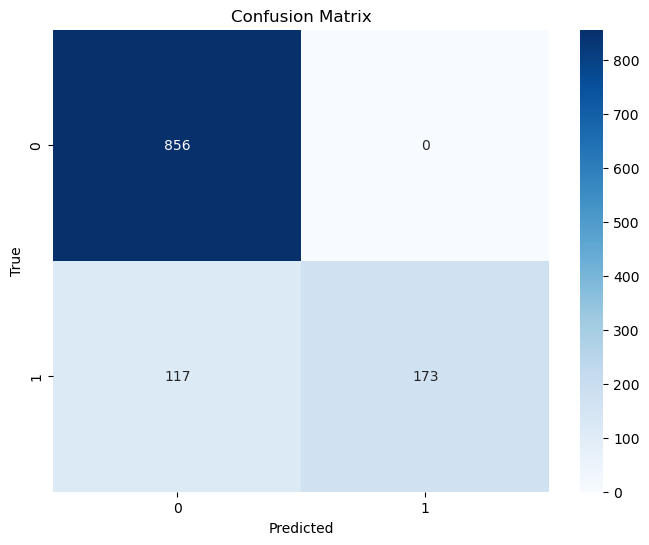

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       856
           1       1.00      0.60      0.75       290

    accuracy                           0.90      1146
   macro avg       0.94      0.80      0.84      1146
weighted avg       0.91      0.90      0.89      1146


Note: Naive Bayes is often effective for text classification tasks like spam detection because it assumes independence between features (words), which is a reasonable assumption for many text-based tasks. However, it can struggle if the independence assumption doesn't hold, leading to suboptimal performance on more complex datasets.


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('D:/emails.csv')
print(df.head())

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['text']) 
y = df['spam']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(f"Classification Report:\n{class_report}")
print("\nNote: Naive Bayes is often effective for text classification tasks like spam detection because it assumes independence between features (words), which is a reasonable assumption for many text-based tasks. However, it can struggle if the independence assumption doesn't hold, leading to suboptimal performance on more complex datasets.")